In [2]:
import tensorflow as tf 
from tensorflow import keras

In [3]:
model = keras.models.load_model('clothing-model.h5')

2022-12-18 01:03:25.246837: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-18 01:03:25.246855: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-18 01:03:25.246868: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ROG-Strix-G17): /proc/driver/nvidia/version does not exist
2022-12-18 01:03:25.247187: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
path = './clothing-dataset-small-master/train/pants/0c99f0b4-3a0d-4d24-bfdd-e9e98914892c.jpg'

In [13]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

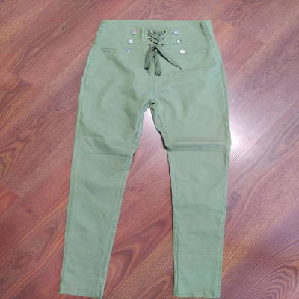

In [14]:
img = load_img(path, target_size=(299,299))
img

In [15]:
import numpy as np

In [16]:
x = np.array(img)
X = np.array([x])

X = preprocess_input(X)

In [17]:
preds = model.predict(X)
preds

1/1 [==============================] - 1s 651ms/step


array([[-2.907086  , -3.4886715 , -1.1878673 , -0.63570696,  7.5757456 ,
        -1.387245  , -4.3032694 ,  4.522073  , -3.7056177 , -3.9823132 ]],
      dtype=float32)

In [18]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]


dict(zip(classes, preds[0]))

{'dress': -2.907086,
 'hat': -3.4886715,
 'longsleeve': -1.1878673,
 'outwear': -0.63570696,
 'pants': 7.5757456,
 'shirt': -1.387245,
 'shoes': -4.3032694,
 'shorts': 4.522073,
 'skirt': -3.7056177,
 't-shirt': -3.9823132}

# Convert to TF Lite

In [19]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('clothing-model.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpunnmy9x4/assets


INFO:tensorflow:Assets written to: /tmp/tmpunnmy9x4/assets
2022-12-18 01:11:35.033658: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-12-18 01:11:35.033687: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-12-18 01:11:35.034315: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpunnmy9x4
2022-12-18 01:11:35.048059: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-12-18 01:11:35.048100: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpunnmy9x4
2022-12-18 01:11:35.090524: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2022-12-18 01:11:35.112393: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2022-12-18 01:11:35.395903: I tensorflow/cc/saved_model/loader.cc:213] Running initializatio

In [20]:
!ls -lh

total 163M
drwxrwxr-x 28 santhosh santhosh 4.0K Dec 17 07:36 anaconda3
drwxrwxr-x  5 santhosh santhosh 4.0K Nov  6  2020 clothing-dataset-small-master
-rw-rw-r--  1 santhosh santhosh  83M Dec  7  2021 clothing-model.h5
-rw-rw-r--  1 santhosh santhosh  81M Dec 18 01:11 clothing-model.tflite
drwxr-xr-x  2 santhosh santhosh 4.0K Dec 17 20:24 Desktop
drwxr-xr-x  2 santhosh santhosh 4.0K Dec 17 06:50 Documents
drwxr-xr-x  4 santhosh santhosh 4.0K Dec 18 01:05 Downloads
drwxr-xr-x  2 santhosh santhosh 4.0K Dec 17 06:50 Music
-rw-rw-r--  1 santhosh santhosh    0 Dec 17 20:46 pants.jpg
drwxr-xr-x  2 santhosh santhosh 4.0K Dec 17 06:50 Pictures
drwxr-xr-x  2 santhosh santhosh 4.0K Dec 17 06:50 Public
drwx------  5 santhosh santhosh 4.0K Dec 17 06:53 snap
drwxr-xr-x  2 santhosh santhosh 4.0K Dec 17 06:50 Templates
-rw-rw-r--  1 santhosh santhosh 160K Dec 18 01:11 tensorflowliteModel.ipynb
-rw-rw-r--  1 santhosh santhosh  18K Dec 17 18:53 Untitled1.ipynb
-rw-rw-r--  1 santhosh santhosh   72 Dec 1

In [21]:
import tensorflow.lite as tflite

In [22]:
interpreter = tflite.Interpreter(model_path='clothing-model.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [23]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [24]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

dict(zip(classes, preds[0]))

{'dress': -2.907085,
 'hat': -3.4886715,
 'longsleeve': -1.1878703,
 'outwear': -0.63570493,
 'pants': 7.575743,
 'shirt': -1.3872466,
 'shoes': -4.3032675,
 'shorts': 4.5220757,
 'skirt': -3.7056181,
 't-shirt': -3.9823136}

# Removing TF dependency

In [25]:
!pip install keras-image-helper

In [26]:
!pip install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime

Looking in indexes: https://pypi.org/simple, https://google-coral.github.io/py-repo/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 1.4 MB/s eta 0:00:001.3 MB/s eta 0:00:010m


In [1]:
#import tensorflow.lite as tflite
import tflite_runtime.interpreter as tflite
from keras_image_helper import create_preprocessor

In [2]:
interpreter = tflite.Interpreter(model_path='clothing-model.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [3]:
preprocessor = create_preprocessor('xception', target_size=(299, 299))

In [4]:
file_location = './clothing-dataset-small-master/train/pants/0c99f0b4-3a0d-4d24-bfdd-e9e98914892c.jpg'
X = preprocessor.from_path(file_location)

In [5]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [6]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

dict(zip(classes, preds[0]))

{'dress': -2.907085,
 'hat': -3.4886715,
 'longsleeve': -1.1878703,
 'outwear': -0.63570493,
 'pants': 7.575743,
 'shirt': -1.3872466,
 'shoes': -4.3032675,
 'shorts': 4.5220757,
 'skirt': -3.7056181,
 't-shirt': -3.9823136}

In [1]:
!python -V

Python 3.9.13


In [2]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 1.1 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.2 MB/s eta 0:00:002.8 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.2 MB/s eta 0:00:0031m938.6 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 1.5 MB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 1.5 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.9/144.9 kB 1.6 MB/s eta 0:00:001.8 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 1.2 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 1.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 1.7 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 1.3 M

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 594.2 kB/s eta 0:00:00 kB/s eta 0:00:01
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4693 sha256=6ac25689612941d23bbb77e5aa6ce568c56dc0219b704979aeec712b0a0e5baa
  Stored in directory: /home/santhosh/.cache/pip/wheels/91/e2/96/f676aa08bfd789328c6576cd0f1fde4a3d686703bb0c247697
  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none-any.whl size=31671 sha256=5b9a16c417259e6fbb5ebc2b99280f908288dade4700fb1b8358947e28cc49a3
  Stored in directory: /home/santhosh/.cache/pip/wheels/fe/04/d1/a10661cc45f03c3cecda50deb2d2c22f57b4e84a75b2a5987e
Successfully built ffmpy python-multipart
Note: you may need to restart the kernel to use updated packages.
